In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


Bad key text.latex.unicode in file /home/mohana/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/mohana/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/mohana/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https:/

In [27]:
def chocochip_count(imgname):
    
    img = cv.imread(imgname, 1) 
    scaled_cookie = cv.resize(img, (255,255)) #scale image

    #make image greyscale -> blur 
    bw_im = cv.cvtColor(scaled_cookie, cv.COLOR_BGR2GRAY)
    blur_im = cv.GaussianBlur(bw_im,(3,3),0)
    #thresholding to make chocochips more prominent
    ret,thresh_im = cv.threshold(blur_im, 85,255,cv.THRESH_BINARY)

    #initializing parameters for blob detection
    params = cv.SimpleBlobDetector_Params()

    #params.minThreshold = 0
    #params.maxThreshold = 100

    #initializing circularity of the chocochips
    params.filterByCircularity = True
    params.minCircularity = 0.18

    #setting the convexivity that is to be allowed
    params.filterByConvexity = True
    params.minConvexity = 0.2

    #setting how much elongation to be allowed
    params.filterByInertia = True
    params.minInertiaRatio = 0.1
    
    ver = (cv.__version__).split('.')
    if int(ver[0]) < 3 :  #if you have opencv ver2.x
        detector = cv.SimpleBlobDetector(params)
    else : 
        detector = cv.SimpleBlobDetector_create(params)   #for opencv 3.x and above

    #list of found blobs
    keypoints = detector.detect(im)

    #length of the list is number of chocochips
    return len(keypoints)


In [28]:
imgname = 'cookies/cookie1.jpg' #input the path of the cookie image to use

In [29]:
chocochip_count(imgname) #predict the number of chocolate chips

8

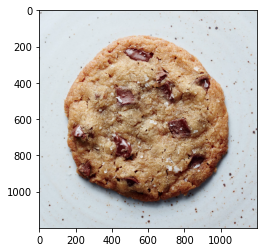

In [30]:
#display the cookie image 
img = cv.imread(imgname, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))